# Random Forest - Binary Classification

**Modello:** Random Forest Classifier

**Dataset:** Processed v3 (43 features, 314k samples)

**Bilanciamento:** `class_weight='balanced'` (built-in scikit-learn)

**Vantaggi RF:**
- Robusto a outliers
- Feature importance interpretabile
- Nessun preprocessing necessario
- Parallelo (n_jobs=-1)

## 1. Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
    f1_score
)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')

print("Librerie importate!")

Librerie importate!


## 2. Caricamento Dati

In [2]:
print("Caricamento dati...\n")

X_train = pd.read_csv('../data/processed_v4_hybrid/X_train.csv')
X_test = pd.read_csv('../data/processed_v4_hybrid/X_test.csv')
y_train = pd.read_csv('../data/processed_v4_hybrid/y_train.csv')['BinaryIncidentGrade']
y_test = pd.read_csv('../data/processed_v4_hybrid/y_test.csv')['BinaryIncidentGrade']

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"\nClass distribution:")
print(y_train.value_counts())
print(f"\nImbalance ratio: {(y_train==0).sum()/(y_train==1).sum():.2f}:1")

Caricamento dati...

X_train: (304848, 43)
X_test: (149537, 43)

Class distribution:
BinaryIncidentGrade
0    152424
1    152424
Name: count, dtype: int64

Imbalance ratio: 1.00:1


## 3. Training Random Forest

In [3]:
print("Training Random Forest con class_weight='balanced'...\n")

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=50,
    min_samples_leaf=20,
    class_weight='balanced',  # Bilanciamento automatico
    random_state=42,
    n_jobs=-1,
    verbose=1
)

model.fit(X_train, y_train)

print("\n✅ Training completato!")

Training Random Forest con class_weight='balanced'...



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.7s



✅ Training completato!


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.0s finished


## 4. Evaluation

In [4]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("="*70)
print("PERFORMANCE TEST SET - Random Forest")
print("="*70)

print("\nClassification Report:")
print(classification_report(y_test, y_pred,
                           target_names=['Non-TP', 'TP'], digits=4))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nPRECISION: {precision:.4f}")
print(f"RECALL:    {recall:.4f}")
print(f"F1-SCORE:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f} ⭐")

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


PERFORMANCE TEST SET - Random Forest

Classification Report:
              precision    recall  f1-score   support

      Non-TP     0.8925    0.9471    0.9190    105987
          TP     0.8488    0.7225    0.7806     43550

    accuracy                         0.8817    149537
   macro avg     0.8707    0.8348    0.8498    149537
weighted avg     0.8798    0.8817    0.8787    149537


PRECISION: 0.8488
RECALL:    0.7225
F1-SCORE:  0.7806
ROC AUC:   0.9240 ⭐


## 5. Confusion Matrix

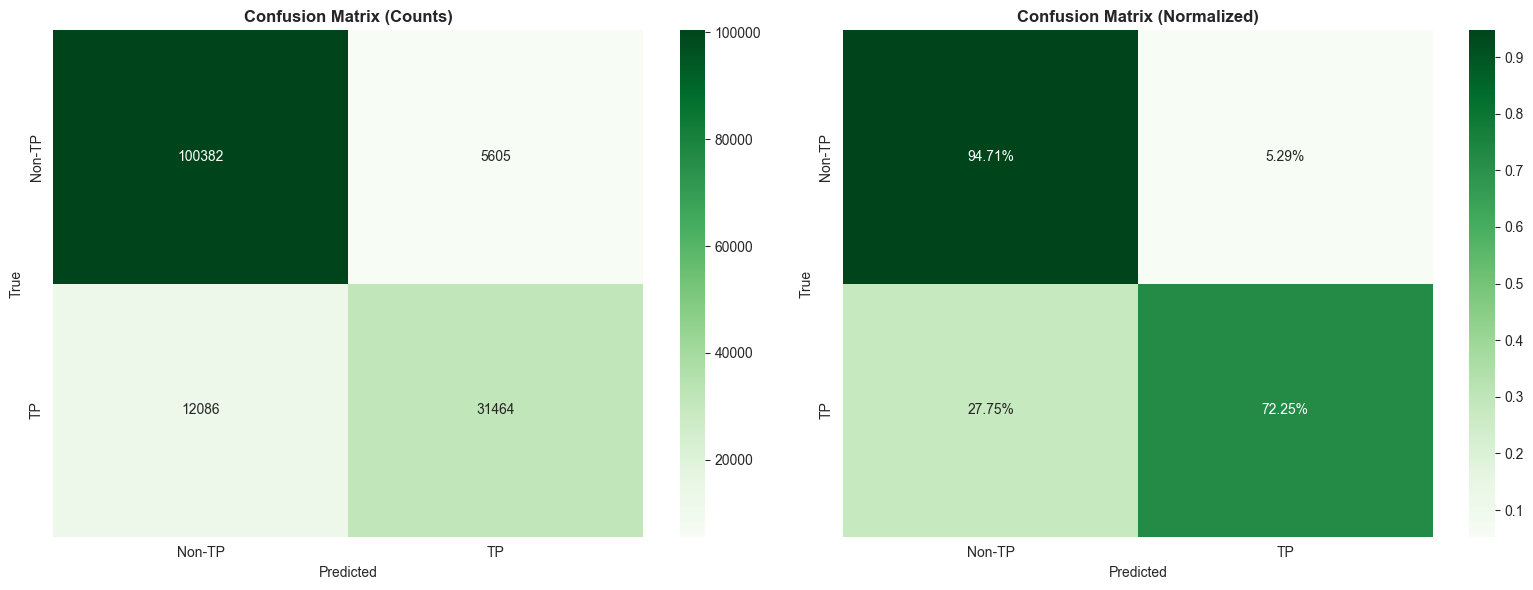

In [5]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non-TP', 'TP'],
            yticklabels=['Non-TP', 'TP'], ax=axes[0])
axes[0].set_title('Confusion Matrix (Counts)', fontweight='bold')
axes[0].set_ylabel('True')
axes[0].set_xlabel('Predicted')

sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens',
            xticklabels=['Non-TP', 'TP'],
            yticklabels=['Non-TP', 'TP'], ax=axes[1])
axes[1].set_title('Confusion Matrix (Normalized)', fontweight='bold')
axes[1].set_ylabel('True')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

## 6. ROC Curve

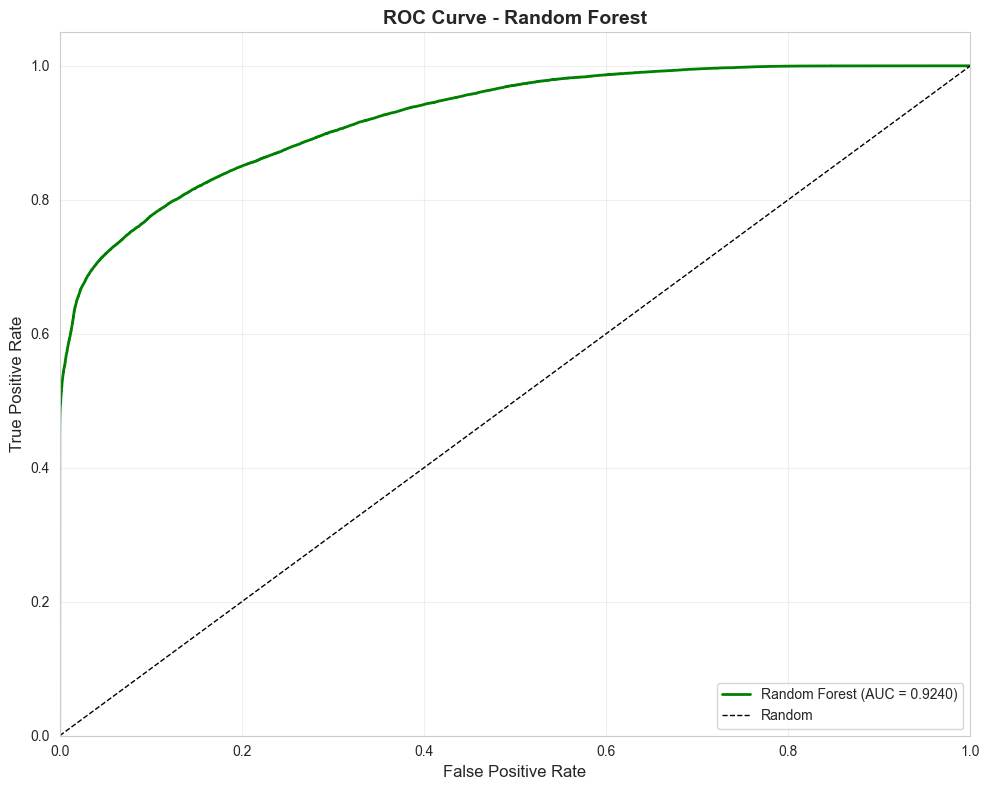

In [6]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Random Forest', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Feature Importance

In [7]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 20 Features:")
print(feature_importance.head(20).to_string(index=False))

Top 20 Features:
                      Feature  Importance
             SmoothedRisk_avg    0.276618
              Roles_freq_mean    0.097903
     ActionGranular_freq_mean    0.080542
       ResourceType_freq_mean    0.074982
       ThreatFamily_freq_mean    0.071348
      ActionGrouped_freq_mean    0.069942
         EntityType_freq_mean    0.050196
  AntispamDirection_freq_mean    0.049305
              GeoLoc_freq_avg    0.042591
           Category_freq_mean    0.031627
        LastVerdict_freq_mean    0.027879
                 NumEvidences    0.022818
   SuspicionLevel_Missing_sum    0.020307
     EvidenceRole_Related_sum    0.020137
                    T1078_sum    0.014373
             Duration_seconds    0.010436
SuspicionLevel_Suspicious_sum    0.006804
                    NumAlerts    0.005550
                    Hour_Last    0.005345
                     Hour_Avg    0.004730


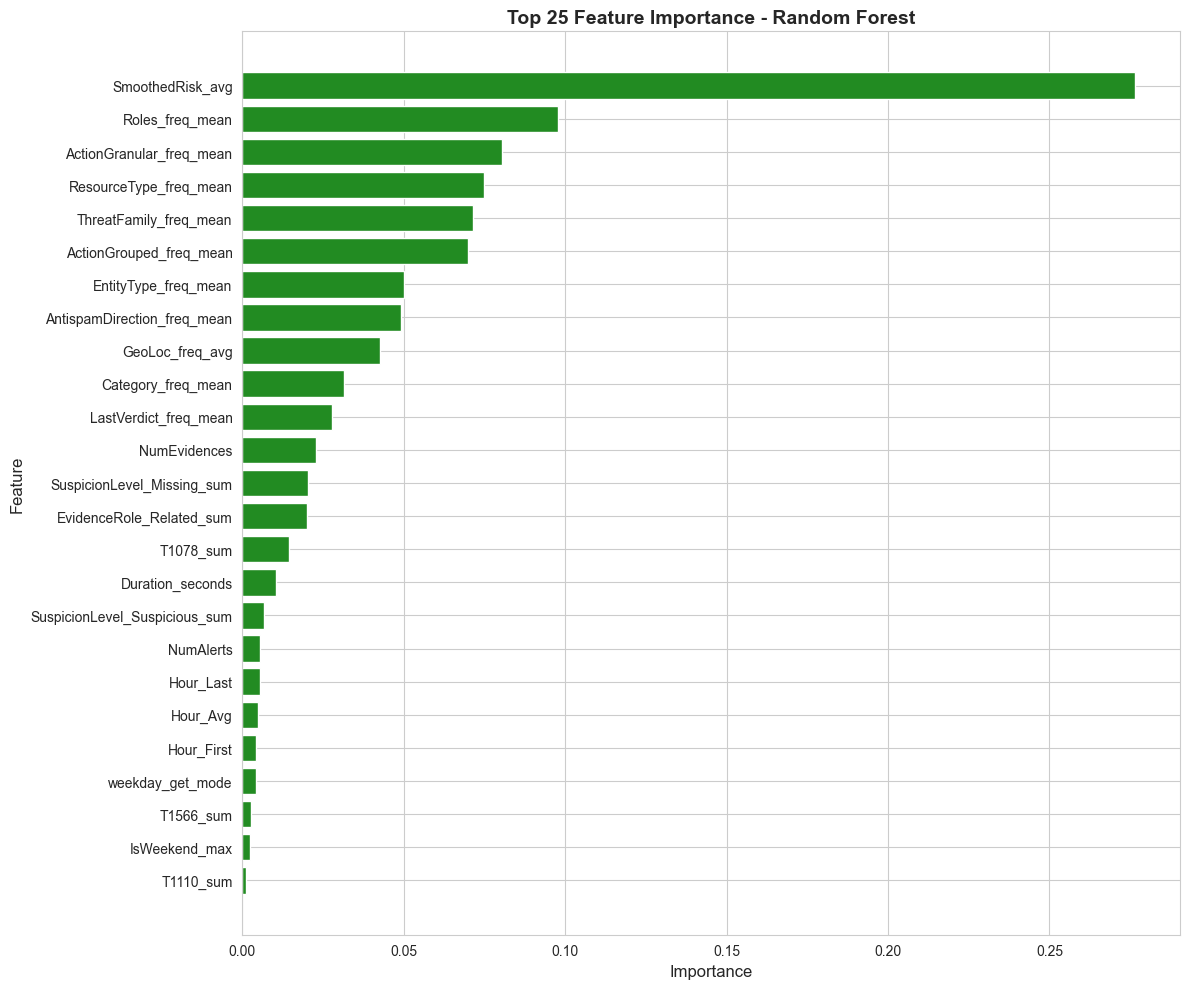

In [8]:
plt.figure(figsize=(12, 10))
top_n = 25
top_features = feature_importance.head(top_n)

plt.barh(range(top_n), top_features['Importance'], color='forestgreen')
plt.yticks(range(top_n), top_features['Feature'])
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title(f'Top {top_n} Feature Importance - Random Forest',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Summary

**Random Forest:** Ensemble di 100 decision trees

**Bilanciamento:** `class_weight='balanced'` pesa automaticamente le classi

**Vantaggi:**
- ✅ Robusto a outliers e missing values
- ✅ Nessun preprocessing (no scaling)
- ✅ Feature importance interpretabile
- ✅ Gestisce relazioni non-lineari
- ✅ Riduce overfitting vs singolo albero

**Hyperparameters chiave:**
- `n_estimators`: Numero di alberi (↑ = più accurato ma più lento)
- `max_depth`: Profondità alberi (controllo overfitting)
- `min_samples_split/leaf`: Sample minimi per split (regolarizzazione)

In [11]:
# Calcola metriche per entrambe le classi
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Salva metriche
metrics = {
    "model_name": "RandomForest_v2",
    "timestamp": datetime.now().isoformat(),
    "dataset_version": "processed_v3_balanced",
    "test_accuracy": float(accuracy_score(y_test, y_pred)),
    "test_precision": float(precision_1),
    "test_recall": float(recall_1),
    "test_f1_score": float(f1_1),
    "test_roc_auc": float(roc_auc),
    "n_features": X_train.shape[1],
    "n_train_samples": len(X_train),
    "n_test_samples": len(X_test),
    "class_distribution_train": {
        "class_0": int((y_train == 0).sum()),
        "class_1": int((y_train == 1).sum())
    },
    "per_class_metrics": {
        "class_0_non_tp": {
            "precision": float(precision_0),
            "recall": float(recall_0),
            "f1_score": float(f1_0)
        },
        "class_1_tp": {
            "precision": float(precision_1),
            "recall": float(recall_1),
            "f1_score": float(f1_1)
        }
    },
    "confusion_matrix": {
        "true_negatives": int(cm[0, 0]),
        "false_positives": int(cm[0, 1]),
        "false_negatives": int(cm[1, 0]),
        "true_positives": int(cm[1, 1])
    },
    "hyperparameters": {
        "n_estimators": model.n_estimators,
        "max_depth": model.max_depth,
        "min_samples_split": model.min_samples_split,
        "min_samples_leaf": model.min_samples_leaf,
        "max_features": model.max_features,
        "class_weight": str(model.class_weight)
    },
    "top_10_features": feature_importance.head(10).to_dict('records')
}

with open(f'{model_dir}/metrics.json', 'w') as f:
    json.dump(metrics, f, indent=2)

print(f"✅ Metriche salvate: {model_dir}/metrics.json")

print(f"\n{'='*60}")
print("RIEPILOGO SALVATAGGIO")
print(f"{'='*60}")
print(f"Directory: {model_dir}")
print(f"  - model.pkl")
print(f"  - feature_importance.csv")
print(f"  - metrics.json")
print(f"{'='*60}")

✅ Metriche salvate: ../models/random_forest_v2/metrics.json

RIEPILOGO SALVATAGGIO
Directory: ../models/random_forest_v2
  - model.pkl
  - feature_importance.csv
  - metrics.json


In [10]:
import os
import json
import pickle
from datetime import datetime
from sklearn.metrics import accuracy_score

# Crea directory per il modello
model_dir = '../models/random_forest_v2'
os.makedirs(model_dir, exist_ok=True)

# Salva modello RandomForest con pickle
model_path = f'{model_dir}/model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(model, f)
print(f"✅ Modello salvato: {model_path}")

# Feature importance già calcolato, salva CSV
feature_importance.to_csv(f'{model_dir}/feature_importance.csv', index=False)
print(f"✅ Feature importance salvato: {model_dir}/feature_importance.csv")

✅ Modello salvato: ../models/random_forest_v2/model.pkl
✅ Feature importance salvato: ../models/random_forest_v2/feature_importance.csv


## 8. Salvataggio Modello e Metriche